In [1]:
import sys
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

sdt_path = ".."
if sdt_path not in sys.path:
    sys.path.insert(1, sdt_path)

from sdt import changepoint as cp

In [2]:
%load_ext autoreload
%autoreload 2
%load_ext line_profiler

In [3]:
s = np.random.RandomState(0)
data = np.concatenate([s.normal(100, 10, 30),
                       s.normal(30, 5, 40),
                       s.normal(50, 20, 20)])
data2 = np.concatenate([s.normal(40, 10, 30),
                        s.normal(200, 5, 40),
                        s.normal(80, 20, 20)])

In [16]:
og = cp.BayesOfflinePython("const", "full_cov")
ogn = cp.BayesOfflineNumba("const", "full_cov")

In [17]:
%timeit og.find_changepoints(data, truncate=-20)

66.4 ms ± 2.23 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [18]:
%timeit ogn.find_changepoints(data, truncate=-20)

12.4 ms ± 133 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [15]:
oncd = cp.bayes_online.BayesOnlinePython(
    "const", "student_t", np.array([250]), np.array([0.1, 0.01, 1, 0]))

In [28]:
oncd.find_changepoints(data)

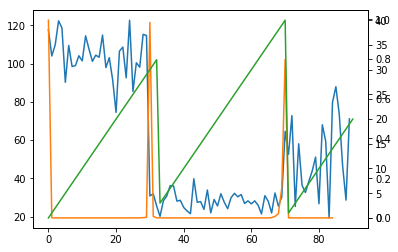

In [29]:
fig, ax = plt.subplots()
ax.plot(data)
ax.twinx().plot(oncd.get_probabilities(5), c="C1")
ax.twinx().plot([np.argmax(p) for p in oncd.probabilities], c="C2")

In [20]:
len(data), len(oncd.get_probabilities(0))

(90, 90)